# 데이터 / 라이브러리 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
from scipy.spatial import ConvexHull
from matplotlib.lines import Line2D
%matplotlib inline

rc('font',family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# 매출데이터 불러오기

In [2]:
sale=pd.read_csv('8)sale.csv',encoding='cp949')
sale

,연분기,행정동코드,동이름,업종코드,업종명,당월매출,당월매출건수,주중매출,주말매출,월요일매출,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,20221,11110515,청운효자동,CS100001,한식음식점,3.015376e+09,115548,2.222314e+09,793062463.0,425159717.0,...,36039,2410,56059,50754,1172,25533,25588,19737,19417,15363
1,20221,11110515,청운효자동,CS100002,중식음식점,4.268588e+07,2382,3.534773e+07,7338157.0,6851542.0,...,0,0,1447,661,6,123,624,565,500,292
2,20221,11110515,청운효자동,CS100003,일식음식점,2.114213e+08,9598,1.484023e+08,63019039.0,13978529.0,...,2841,25,3671,5545,273,3911,2137,1182,1348,366
3,20221,11110515,청운효자동,CS100004,양식음식점,1.896393e+09,36013,1.125549e+09,770843562.0,136910365.0,...,15377,1437,11566,22746,327,15017,10687,3360,3611,1308
4,20221,11110515,청운효자동,CS100005,제과점,9.243973e+08,68768,5.065089e+08,417888351.0,69873730.0,...,16359,626,23135,44533,403,19145,19147,13144,10393,5436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101699,20232,11740700,둔촌2동,CS300029,애완동물,2.310953e+08,7005,1.495734e+08,81521901.0,33774326.0,...,3041,375,3335,3530,0,506,1466,1106,2049,1739
101700,20232,11740700,둔촌2동,CS300031,가구,3.607156e+07,51,1.993185e+07,16139714.0,12948766.0,...,22,0,28,23,0,0,23,14,5,9
101701,20232,11740700,둔촌2동,CS300033,철물점,1.415857e+08,1558,1.067220e+08,34863639.0,33986419.0,...,196,0,533,689,0,82,243,273,270,355
101702,20232,11740700,둔촌2동,CS300035,인테리어,2.508802e+06,139,2.508802e+06,0.0,2508802.0,...,0,0,0,139,0,0,0,0,139,0


# 데이터 검토, 전처리

## 중구 데이터만 추출

In [3]:
#중구만 추출 => 중구 행정동코드 '11140'
sale['행정동코드']=sale['행정동코드'].astype(str)

sale_중구=sale[sale['행정동코드'].str.startswith('11140')]

## 연분기 2023년 1월 데이터만 추출

In [4]:
#중구 연분기 20231만 추출
sale_중구=sale_중구[sale_중구['연분기']==20231]
sale_중구

,연분기,행정동코드,동이름,업종코드,업종명,당월매출,당월매출건수,주중매출,주말매출,월요일매출,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
68249,20231,11140520,소공동,CS100001,한식음식점,4.314513e+10,807660,3.873336e+10,4.411773e+09,6.294185e+09,...,184925,62042,381177,228578,1015,72412,163737,171346,128524,72711
68250,20231,11140520,소공동,CS100002,중식음식점,2.214131e+09,46982,2.030825e+09,1.833059e+08,3.189920e+08,...,10781,2066,23441,12268,261,4649,9824,10749,6737,3490
68251,20231,11140520,소공동,CS100003,일식음식점,4.330557e+09,77916,4.154198e+09,1.763592e+08,6.938303e+08,...,12642,10071,32880,27029,309,12890,22715,14481,7148,2373
68252,20231,11140520,소공동,CS100004,양식음식점,1.850168e+09,35416,1.573923e+09,2.762455e+08,2.667192e+08,...,6345,1146,10575,16458,113,4572,8285,7326,4903,1840
68253,20231,11140520,소공동,CS100005,제과점,1.817596e+09,136704,1.509332e+09,3.082638e+08,2.503996e+08,...,28937,4273,54367,68960,893,18738,36762,31846,23095,11998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68812,20231,11140680,중림동,CS300021,문구,3.055536e+08,23807,3.055536e+08,0.000000e+00,3.629390e+07,...,3326,0,7785,11412,0,2343,4761,4686,5517,1889
68813,20231,11140680,중림동,CS300024,운동/경기용품,2.795932e+08,3341,1.300997e+08,1.494935e+08,3.393906e+07,...,0,0,1725,1616,162,108,54,2048,969,0
68814,20231,11140680,중림동,CS300028,화초,2.403266e+08,4196,2.378165e+08,2.510101e+06,4.027175e+07,...,687,27,1084,2503,46,829,737,867,784,327
68815,20231,11140680,중림동,CS300031,가구,1.190581e+09,867,3.587402e+08,8.318405e+08,4.507368e+07,...,404,0,232,635,0,0,202,289,174,202


In [5]:
#중구 동이름 추출
sale_중구['동이름'].unique()

array(['소공동', '회현동', '명동', '필동', '장충동', '광희동', '을지로동', '신당동', '다산동',
       '약수동', '청구동', '신당5동', '동화동', '황학동', '중림동'], dtype=object)

In [6]:
#중구의 인기 업종이 무엇인지확인
sale_중구['업종명'].value_counts()[:10] 

업종명
한식음식점      15
편의점        15
슈퍼마켓       15
미용실        15
분식전문점      15
호프-간이주점    15
커피-음료      15
일반의원       14
의약품        14
치과의원       14
Name: count, dtype: int64

## 업종은 커피-음료 데이터 추출

In [7]:
중구커피=sale_중구[sale_중구['업종명']=='커피-음료']
중구커피

,연분기,행정동코드,동이름,업종코드,업종명,당월매출,당월매출건수,주중매출,주말매출,월요일매출,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
68258,20231,11140520,소공동,CS100010,커피-음료,1.155227e+10,1505578,1.087137e+10,6.808989e+08,2.003405e+09,...,84695,9653,738096,620939,3570,237139,466461,367766,232191,51910
68299,20231,11140540,회현동,CS100010,커피-음료,8.656192e+09,1231612,7.795360e+09,8.608317e+08,1.356676e+09,...,52466,5757,530633,568404,1594,177288,415866,283628,150528,70145
68348,20231,11140550,명동,CS100010,커피-음료,2.927405e+10,2845718,2.330994e+10,5.964108e+09,4.158878e+09,...,354136,45499,1216720,1340264,15086,544405,865128,630582,359680,142118
68393,20231,11140570,필동,CS100010,커피-음료,3.104577e+09,459711,2.733308e+09,3.712690e+08,5.025053e+08,...,48970,5347,196744,229679,5575,118739,126393,70553,74811,30351
68428,20231,11140580,장충동,CS100010,커피-음료,1.102057e+09,63865,7.180812e+08,3.839753e+08,1.141151e+08,...,19115,1607,27830,32450,751,16094,15694,9159,10520,8061
68453,20231,11140590,광희동,CS100010,커피-음료,2.677169e+09,344946,2.107375e+09,5.697946e+08,3.770983e+08,...,47351,21793,158687,167326,2242,88450,105945,65596,43520,20260
68500,20231,11140605,을지로동,CS100010,커피-음료,3.432808e+09,415668,2.907775e+09,5.250332e+08,5.040844e+08,...,38323,4609,195784,184127,589,76170,123917,95758,59574,23921
68543,20231,11140615,신당동,CS100010,커피-음료,8.395211e+08,165853,7.051510e+08,1.343701e+08,1.325059e+08,...,38255,24555,71844,88481,680,35008,61354,34669,21992,6623
68581,20231,11140625,다산동,CS100010,커피-음료,7.377679e+08,94150,5.283315e+08,2.094365e+08,9.258229e+07,...,22855,2797,42342,48661,772,21842,30325,15747,14539,7774
68622,20231,11140635,약수동,CS100010,커피-음료,5.563038e+08,60881,4.065083e+08,1.497955e+08,5.477574e+07,...,14318,4506,27165,32122,523,14234,17938,10147,9954,6488


In [8]:
중구커피.columns

Index(['연분기', '행정동코드', '동이름', '업종코드', '업종명', '당월매출', '당월매출건수', '주중매출', '주말매출',
       '월요일매출', '화요일매출', '수요일매출', '목요일매출', '금요일매출', '토요일매출', '일요일매출', '매출0006',
       '매출0611', '매출1114', '매출1417', '매출1721', '매출2124', '남성매출', '여성매출',
       '10대매출', '20대매출', '30대매출', '40대매출', '50대매출', '60대매출', '주중매출건수',
       '주말매출건수', '월요일매출건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수',
       '토요일_매출_건수', '일요일_매출_건수', '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수',
       '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수',
       '시간대_건수~24_매출_건수', '남성_매출_건수', '여성_매출_건수', '연령대_10_매출_건수',
       '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수', '연령대_50_매출_건수',
       '연령대_60_이상_매출_건수'],
      dtype='object')

In [9]:
# 중구커피['청년층매출건수']=중구커피['20대매출']+중구커피['30대매출']
# 중구커피['중년층매출건수']=중구커피['40대매출']+중구커피['50대매출']
# 중구커피['노년층매출건수']=중구커피['60대매출'] #60대만인지 60대부터~ 70,80대까지인지 불분명

# 중구커피['청년층매출']=중구커피['연령대_20_매출_건수']+중구커피['연령대_30_매출_건수']
# 중구커피['중년층매출']=중구커피['연령대_40_매출_건수']+중구커피['연령대_50_매출_건수']
# 중구커피['노년층매출']=중구커피['연령대_60_이상_매출_건수']
# 중구커피

In [10]:
중구커피.columns

Index(['연분기', '행정동코드', '동이름', '업종코드', '업종명', '당월매출', '당월매출건수', '주중매출', '주말매출',
       '월요일매출', '화요일매출', '수요일매출', '목요일매출', '금요일매출', '토요일매출', '일요일매출', '매출0006',
       '매출0611', '매출1114', '매출1417', '매출1721', '매출2124', '남성매출', '여성매출',
       '10대매출', '20대매출', '30대매출', '40대매출', '50대매출', '60대매출', '주중매출건수',
       '주말매출건수', '월요일매출건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수',
       '토요일_매출_건수', '일요일_매출_건수', '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수',
       '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수',
       '시간대_건수~24_매출_건수', '남성_매출_건수', '여성_매출_건수', '연령대_10_매출_건수',
       '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수', '연령대_50_매출_건수',
       '연령대_60_이상_매출_건수'],
      dtype='object')

# 행정동별 생활인구데이터 불러오기

In [11]:
dong_pop=pd.read_excel('생활인구데이터.xlsx') #로딩 많이 느림
dong_pop

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20231001,0,11380530,22734.2529,360.9099,224.8362,552.1779,598.9296,882.5695,836.1706,...,811.8566,862.1507,873.9038,667.0151,1019.9621,960.8058,1075.1081,1002.6932,762.4476,2039.5830
1,20231001,0,11380631,24576.9924,723.6289,397.3605,699.1521,623.6417,922.5469,817.1459,...,882.1717,927.3364,1005.0317,893.7216,1086.5414,1096.7991,1067.6682,1057.3139,710.7672,1851.1231
2,20231001,0,11140550,9048.8135,541.6812,165.5135,152.9228,390.9228,454.5985,385.9667,...,384.1645,297.1103,374.7113,399.9091,368.0235,307.4670,208.6892,136.8860,132.3833,351.7992
3,20231001,0,11350595,39636.1446,1604.7508,791.9107,1101.2529,1532.8742,1554.1134,1296.7465,...,1424.8983,1313.0002,1459.8118,1387.5974,1475.8228,1340.9569,1648.9524,1492.2480,1298.7019,3098.5651
4,20231001,0,11470540,18560.2696,648.7150,547.4209,965.5009,544.2008,626.6250,497.4201,...,592.8334,502.8279,614.1144,637.1190,1082.4648,831.0457,803.1677,574.2480,437.7856,1088.3779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315451,20231031,23,11350560,23328.3245,723.3146,372.0371,905.6096,2148.6470,1095.6983,698.0627,...,705.3973,672.4282,793.7318,755.7376,909.3189,689.4435,773.8896,749.0588,573.7800,1694.6262
315452,20231031,23,11650570,19627.1808,1194.3273,806.4547,895.6581,361.9207,326.0215,338.9087,...,369.4881,426.8944,825.1702,1075.5930,1122.3634,715.4737,641.2286,423.3113,401.6018,1097.1644
315453,20231031,23,11680630,30933.8632,780.3734,855.8412,2173.2886,915.2354,1101.5112,1176.4238,...,1212.6021,1148.9860,1311.5816,1414.4604,1862.3325,1245.7462,886.7439,632.8622,441.0081,1025.4172
315454,20231031,23,11290770,12949.8318,368.1497,256.7063,350.8151,368.1697,451.8408,430.3816,...,525.8059,513.0067,495.9601,469.5965,485.6948,535.5495,581.4097,495.3314,468.5594,1203.8335


# 데이터 검토, 전처리

In [12]:
dong_pop['행정동코드']=dong_pop['행정동코드'].astype(str)

In [13]:
dong_pop.isna().sum()

기준일ID              0
시간대구분              0
행정동코드              0
총생활인구수             0
남자0세부터9세생활인구수      0
남자10세부터14세생활인구수    0
남자15세부터19세생활인구수    0
남자20세부터24세생활인구수    0
남자25세부터29세생활인구수    0
남자30세부터34세생활인구수    0
남자35세부터39세생활인구수    0
남자40세부터44세생활인구수    0
남자45세부터49세생활인구수    0
남자50세부터54세생활인구수    0
남자55세부터59세생활인구수    0
남자60세부터64세생활인구수    0
남자65세부터69세생활인구수    0
남자70세이상생활인구수       0
여자0세부터9세생활인구수      0
여자10세부터14세생활인구수    0
여자15세부터19세생활인구수    0
여자20세부터24세생활인구수    0
여자25세부터29세생활인구수    0
여자30세부터34세생활인구수    0
여자35세부터39세생활인구수    0
여자40세부터44세생활인구수    0
여자45세부터49세생활인구수    0
여자50세부터54세생활인구수    0
여자55세부터59세생활인구수    0
여자60세부터64세생활인구수    0
여자65세부터69세생활인구수    0
여자70세이상생활인구수       0
dtype: int64

In [14]:
#청년층 남성 그룹 (20 ~ 39세 그룹은 4개의 피처)
dong_pop['청년층(남성)']=(dong_pop['남자20세부터24세생활인구수']
                     +dong_pop['남자25세부터29세생활인구수']+\
dong_pop['남자30세부터34세생활인구수']+dong_pop['남자35세부터39세생활인구수'])/4

#청년층 남성 그룹 (40 ~ 59세 그룹은 4개의 피처)
dong_pop['중년층(남성)']=(dong_pop['남자40세부터44세생활인구수']+
                     dong_pop['남자45세부터49세생활인구수']+
                     dong_pop['남자50세부터54세생활인구수']+\
dong_pop['남자55세부터59세생활인구수'])/4
           
#노년층 남성 그룹 (60세 ~ 그 이상의 그룹은 3개의 피처)
dong_pop['노년층(남성)']=(dong_pop['남자60세부터64세생활인구수']+
                     dong_pop['남자65세부터69세생활인구수']+dong_pop['남자70세이상생활인구수'])/3
dong_pop

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수,청년층(남성),중년층(남성),노년층(남성)
0,20231001,0,11380530,22734.2529,360.9099,224.8362,552.1779,598.9296,882.5695,836.1706,...,667.0151,1019.9621,960.8058,1075.1081,1002.6932,762.4476,2039.5830,814.329650,860.431100,913.848567
1,20231001,0,11380631,24576.9924,723.6289,397.3605,699.1521,623.6417,922.5469,817.1459,...,893.7216,1086.5414,1096.7991,1067.6682,1057.3139,710.7672,1851.1231,847.934500,942.111875,818.095500
2,20231001,0,11140550,9048.8135,541.6812,165.5135,152.9228,390.9228,454.5985,385.9667,...,399.9091,368.0235,307.4670,208.6892,136.8860,132.3833,351.7992,432.944700,423.484425,207.548367
3,20231001,0,11350595,39636.1446,1604.7508,791.9107,1101.2529,1532.8742,1554.1134,1296.7465,...,1387.5974,1475.8228,1340.9569,1648.9524,1492.2480,1298.7019,3098.5651,1474.450100,1406.742025,1393.732967
4,20231001,0,11470540,18560.2696,648.7150,547.4209,965.5009,544.2008,626.6250,497.4201,...,637.1190,1082.4648,831.0457,803.1677,574.2480,437.7856,1088.3779,538.491300,783.297700,510.652100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315451,20231031,23,11350560,23328.3245,723.3146,372.0371,905.6096,2148.6470,1095.6983,698.0627,...,755.7376,909.3189,689.4435,773.8896,749.0588,573.7800,1694.6262,1212.876750,768.056575,703.133967
315452,20231031,23,11650570,19627.1808,1194.3273,806.4547,895.6581,361.9207,326.0215,338.9087,...,1075.5930,1122.3634,715.4737,641.2286,423.3113,401.6018,1097.1644,405.296925,901.456375,449.681033
315453,20231031,23,11680630,30933.8632,780.3734,855.8412,2173.2886,915.2354,1101.5112,1176.4238,...,1414.4604,1862.3325,1245.7462,886.7439,632.8622,441.0081,1025.4172,1128.693525,1384.159925,516.547167
315454,20231031,23,11290770,12949.8318,368.1497,256.7063,350.8151,368.1697,451.8408,430.3816,...,469.5965,485.6948,535.5495,581.4097,495.3314,468.5594,1203.8335,436.402450,438.514525,468.655433


In [15]:
#청년층 여성 그룹 (20 ~ 39세 그룹은 4개의 피처)
dong_pop['청년층(여성)']=(dong_pop['여자20세부터24세생활인구수']
                     +dong_pop['여자25세부터29세생활인구수']+\
dong_pop['여자30세부터34세생활인구수']+dong_pop['남자35세부터39세생활인구수'])/4

#중년층 여성 그룹 (40 ~ 59세 그룹은 4개의 피처)
dong_pop['중년층(여성)']=(dong_pop['여자40세부터44세생활인구수']+
                     dong_pop['여자45세부터49세생활인구수']+
                     dong_pop['여자50세부터54세생활인구수']+\
dong_pop['여자55세부터59세생활인구수'])/4
           
#노년층 여성 그룹 (60세 ~ 3개 피처)
dong_pop['노년층(여성)']=(dong_pop['여자60세부터64세생활인구수']+
                     dong_pop['여자65세부터69세생활인구수']+dong_pop['여자70세이상생활인구수'])/3
dong_pop


,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수,청년층(남성),중년층(남성),노년층(남성),청년층(여성),중년층(여성),노년층(여성)
0,20231001,0,11380530,22734.2529,360.9099,224.8362,552.1779,598.9296,882.5695,836.1706,...,1075.1081,1002.6932,762.4476,2039.5830,814.329650,860.431100,913.848567,846.150475,930.722775,1268.241267
1,20231001,0,11380631,24576.9924,723.6289,397.3605,699.1521,623.6417,922.5469,817.1459,...,1067.6682,1057.3139,710.7672,1851.1231,847.934500,942.111875,818.095500,907.789425,1036.182575,1206.401400
2,20231001,0,11140550,9048.8135,541.6812,165.5135,152.9228,390.9228,454.5985,385.9667,...,208.6892,136.8860,132.3833,351.7992,432.944700,423.484425,207.548367,392.627925,321.022200,207.022833
3,20231001,0,11350595,39636.1446,1604.7508,791.9107,1101.2529,1532.8742,1554.1134,1296.7465,...,1648.9524,1492.2480,1298.7019,3098.5651,1474.450100,1406.742025,1393.732967,1470.343325,1463.332375,1963.171667
4,20231001,0,11470540,18560.2696,648.7150,547.4209,965.5009,544.2008,626.6250,497.4201,...,803.1677,574.2480,437.7856,1088.3779,538.491300,783.297700,510.652100,554.708725,838.449300,700.137167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315451,20231031,23,11350560,23328.3245,723.3146,372.0371,905.6096,2148.6470,1095.6983,698.0627,...,773.8896,749.0588,573.7800,1694.6262,1212.876750,768.056575,703.133967,936.413450,782.097400,1005.821667
315452,20231031,23,11650570,19627.1808,1194.3273,806.4547,895.6581,361.9207,326.0215,338.9087,...,641.2286,423.3113,401.6018,1097.1644,405.296925,901.456375,449.681033,447.303000,888.664675,640.692500
315453,20231031,23,11680630,30933.8632,780.3734,855.8412,2173.2886,915.2354,1101.5112,1176.4238,...,886.7439,632.8622,441.0081,1025.4172,1128.693525,1384.159925,516.547167,1227.913500,1352.320750,699.762500
315454,20231031,23,11290770,12949.8318,368.1497,256.7063,350.8151,368.1697,451.8408,430.3816,...,581.4097,495.3314,468.5594,1203.8335,436.402450,438.514525,468.655433,524.559900,518.062625,722.574767


In [16]:
#청년층 그룹(남성+여성)
dong_pop['청년층']=(dong_pop['청년층(남성)']+dong_pop['청년층(여성)'])/2
dong_pop['중년층']=(dong_pop['중년층(남성)']+dong_pop['중년층(여성)'])/2
dong_pop['노년층']=(dong_pop['노년층(남성)']+dong_pop['노년층(여성)'])/2
dong_pop

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자70세이상생활인구수,청년층(남성),중년층(남성),노년층(남성),청년층(여성),중년층(여성),노년층(여성),청년층,중년층,노년층
0,20231001,0,11380530,22734.2529,360.9099,224.8362,552.1779,598.9296,882.5695,836.1706,...,2039.5830,814.329650,860.431100,913.848567,846.150475,930.722775,1268.241267,830.240063,895.576937,1091.044917
1,20231001,0,11380631,24576.9924,723.6289,397.3605,699.1521,623.6417,922.5469,817.1459,...,1851.1231,847.934500,942.111875,818.095500,907.789425,1036.182575,1206.401400,877.861962,989.147225,1012.248450
2,20231001,0,11140550,9048.8135,541.6812,165.5135,152.9228,390.9228,454.5985,385.9667,...,351.7992,432.944700,423.484425,207.548367,392.627925,321.022200,207.022833,412.786313,372.253312,207.285600
3,20231001,0,11350595,39636.1446,1604.7508,791.9107,1101.2529,1532.8742,1554.1134,1296.7465,...,3098.5651,1474.450100,1406.742025,1393.732967,1470.343325,1463.332375,1963.171667,1472.396713,1435.037200,1678.452317
4,20231001,0,11470540,18560.2696,648.7150,547.4209,965.5009,544.2008,626.6250,497.4201,...,1088.3779,538.491300,783.297700,510.652100,554.708725,838.449300,700.137167,546.600013,810.873500,605.394633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315451,20231031,23,11350560,23328.3245,723.3146,372.0371,905.6096,2148.6470,1095.6983,698.0627,...,1694.6262,1212.876750,768.056575,703.133967,936.413450,782.097400,1005.821667,1074.645100,775.076987,854.477817
315452,20231031,23,11650570,19627.1808,1194.3273,806.4547,895.6581,361.9207,326.0215,338.9087,...,1097.1644,405.296925,901.456375,449.681033,447.303000,888.664675,640.692500,426.299962,895.060525,545.186767
315453,20231031,23,11680630,30933.8632,780.3734,855.8412,2173.2886,915.2354,1101.5112,1176.4238,...,1025.4172,1128.693525,1384.159925,516.547167,1227.913500,1352.320750,699.762500,1178.303512,1368.240338,608.154833
315454,20231031,23,11290770,12949.8318,368.1497,256.7063,350.8151,368.1697,451.8408,430.3816,...,1203.8335,436.402450,438.514525,468.655433,524.559900,518.062625,722.574767,480.481175,478.288575,595.615100


In [17]:
age_df=dong_pop[['기준일ID','시간대구분','행정동코드','총생활인구수','청년층','중년층','노년층']]
#age_df.to_excel('age_df.xlsx', index=False)
age_df

,기준일ID,시간대구분,행정동코드,총생활인구수,청년층,중년층,노년층
0,20231001,0,11380530,22734.2529,830.240063,895.576937,1091.044917
1,20231001,0,11380631,24576.9924,877.861962,989.147225,1012.248450
2,20231001,0,11140550,9048.8135,412.786313,372.253312,207.285600
3,20231001,0,11350595,39636.1446,1472.396713,1435.037200,1678.452317
4,20231001,0,11470540,18560.2696,546.600013,810.873500,605.394633
...,...,...,...,...,...,...,...
315451,20231031,23,11350560,23328.3245,1074.645100,775.076987,854.477817
315452,20231031,23,11650570,19627.1808,426.299962,895.060525,545.186767
315453,20231031,23,11680630,30933.8632,1178.303512,1368.240338,608.154833
315454,20231031,23,11290770,12949.8318,480.481175,478.288575,595.615100


In [18]:
# 자치구코드로 그룹화하고 중복된 자치구코드의 경우 해당 열들의 값을 합산한 후 개수로 나누어 평균 구하기
grouped_df = age_df.groupby('행정동코드').agg({'총생활인구수':'sum','청년층': 'sum', 
                                          '중년층': 'sum', '노년층': 'sum',
                                          '행정동코드': 'size'})

# 중복된 자치구코드의 개수로 나누어 평균 계산
grouped_df['총생활인구'] = grouped_df['총생활인구수'] / grouped_df['행정동코드']
grouped_df['청년층생활인구'] = grouped_df['청년층'] / grouped_df['행정동코드']
grouped_df['중년층생활인구'] = grouped_df['중년층'] / grouped_df['행정동코드']
grouped_df['노년층생활인구'] = grouped_df['노년층'] / grouped_df['행정동코드']

grouped_df


,총생활인구수,청년층,중년층,노년층,행정동코드,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구
행정동코드,,,,,,,,,
11110515,1.363602e+07,4.497488e+05,5.400277e+05,4.449660e+05,744,18327.989952,604.501094,725.843643,598.072540
11110530,1.882916e+07,8.254156e+05,8.660868e+05,5.637366e+05,744,25308.006034,1109.429592,1164.095226,757.710443
11110540,4.527197e+06,1.996818e+05,1.859621e+05,1.475677e+05,744,6084.941765,268.389532,249.948997,198.343735
11110550,1.054574e+07,3.425105e+05,4.152329e+05,4.060881e+05,744,14174.375958,460.363540,558.108721,545.817337
11110560,1.301626e+07,3.354900e+05,5.394508e+05,6.213169e+05,744,17494.976655,450.927417,725.068227,835.103388
...,...,...,...,...,...,...,...,...,...
11740650,1.764396e+07,7.016745e+05,6.828348e+05,7.187949e+05,744,23714.998514,943.110920,917.788726,966.122231
11740660,1.955683e+07,7.031695e+05,8.097457e+05,7.770674e+05,744,26286.068053,945.120324,1088.367934,1044.445493
11740685,4.105220e+07,1.463134e+06,1.635335e+06,1.800261e+06,744,55177.686533,1966.577409,2198.030511,2419.705148


In [19]:
age_df=grouped_df.drop(columns=['총생활인구수','청년층','중년층','노년층','행정동코드']) #우측 자치구코드 피처는 제거
age_df 


,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구
행정동코드,,,,
11110515,18327.989952,604.501094,725.843643,598.072540
11110530,25308.006034,1109.429592,1164.095226,757.710443
11110540,6084.941765,268.389532,249.948997,198.343735
11110550,14174.375958,460.363540,558.108721,545.817337
11110560,17494.976655,450.927417,725.068227,835.103388
...,...,...,...,...
11740650,23714.998514,943.110920,917.788726,966.122231
11740660,26286.068053,945.120324,1088.367934,1044.445493
11740685,55177.686533,1966.577409,2198.030511,2419.705148


In [20]:
age_df=age_df.reset_index()
age_df

,행정동코드,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구
0,11110515,18327.989952,604.501094,725.843643,598.072540
1,11110530,25308.006034,1109.429592,1164.095226,757.710443
2,11110540,6084.941765,268.389532,249.948997,198.343735
3,11110550,14174.375958,460.363540,558.108721,545.817337
4,11110560,17494.976655,450.927417,725.068227,835.103388
...,...,...,...,...,...
419,11740650,23714.998514,943.110920,917.788726,966.122231
420,11740660,26286.068053,945.120324,1088.367934,1044.445493
421,11740685,55177.686533,1966.577409,2198.030511,2419.705148
422,11740690,4584.767638,115.013132,183.275937,179.848323


# 데이터셋 merge

In [21]:
merged=pd.merge(age_df, 중구커피, how='inner', on='행정동코드')
merged


,행정동코드,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,연분기,동이름,업종코드,업종명,당월매출,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,11140520,27907.641097,1407.112180,1352.580391,562.617307,20231,소공동,CS100010,커피-음료,1.155227e+10,...,84695,9653,738096,620939,3570,237139,466461,367766,232191,51910
1,11140540,26546.049150,1184.752222,1325.987566,884.069711,20231,회현동,CS100010,커피-음료,8.656192e+09,...,52466,5757,530633,568404,1594,177288,415866,283628,150528,70145
2,11140550,36805.147840,2061.659380,1740.061549,719.163140,20231,명동,CS100010,커피-음료,2.927405e+10,...,354136,45499,1216720,1340264,15086,544405,865128,630582,359680,142118
3,11140570,14392.644174,776.238428,555.861483,391.035360,20231,필동,CS100010,커피-음료,3.104577e+09,...,48970,5347,196744,229679,5575,118739,126393,70553,74811,30351
4,11140580,12580.356365,709.440171,492.069254,330.318729,20231,장충동,CS100010,커피-음료,1.102057e+09,...,19115,1607,27830,32450,751,16094,15694,9159,10520,8061
5,11140590,24360.175038,1313.304171,1028.583419,709.117618,20231,광희동,CS100010,커피-음료,2.677169e+09,...,47351,21793,158687,167326,2242,88450,105945,65596,43520,20260
6,11140605,17184.205399,805.896742,832.192192,599.189873,20231,을지로동,CS100010,커피-음료,3.432808e+09,...,38323,4609,195784,184127,589,76170,123917,95758,59574,23921
7,11140615,22116.834544,1091.131011,1003.414341,720.570318,20231,신당동,CS100010,커피-음료,8.395211e+08,...,38255,24555,71844,88481,680,35008,61354,34669,21992,6623
8,11140625,14993.252805,623.212432,582.024076,566.484988,20231,다산동,CS100010,커피-음료,7.377679e+08,...,22855,2797,42342,48661,772,21842,30325,15747,14539,7774
9,11140635,13256.743571,453.704620,524.253548,607.463540,20231,약수동,CS100010,커피-음료,5.563038e+08,...,14318,4506,27165,32122,523,14234,17938,10147,9954,6488


In [22]:
merged.columns

Index(['행정동코드', '총생활인구', '청년층생활인구', '중년층생활인구', '노년층생활인구', '연분기', '동이름', '업종코드',
       '업종명', '당월매출', '당월매출건수', '주중매출', '주말매출', '월요일매출', '화요일매출', '수요일매출',
       '목요일매출', '금요일매출', '토요일매출', '일요일매출', '매출0006', '매출0611', '매출1114',
       '매출1417', '매출1721', '매출2124', '남성매출', '여성매출', '10대매출', '20대매출', '30대매출',
       '40대매출', '50대매출', '60대매출', '주중매출건수', '주말매출건수', '월요일매출건수', '화요일_매출_건수',
       '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수',
       '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수',
       '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수',
       '여성_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수',
       '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수'],
      dtype='object')

In [23]:
merged=merged.drop(columns=['업종코드','월요일매출', '화요일매출', '수요일매출', '목요일매출',
                            '금요일매출','토요일매출', '일요일매출','매출0006',
                            '매출0611', '매출1114', '매출1417', '매출1721',
       '매출2124','월요일매출건수', '화요일_매출_건수', '수요일_매출_건수',
       '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수', '시간대_건수~06_매출_건수',
       '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수',
       '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수', '여성_매출_건수',
       '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수',
       '연령대_50_매출_건수', '연령대_60_이상_매출_건수'],axis=1)

In [24]:
merged

,행정동코드,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,연분기,동이름,업종명,당월매출,당월매출건수,...,남성매출,여성매출,10대매출,20대매출,30대매출,40대매출,50대매출,60대매출,주중매출건수,주말매출건수
0,11140520,27907.641097,1407.112180,1352.580391,562.617307,20231,소공동,커피-음료,1.155227e+10,1505578,...,4.906255e+09,4.219467e+09,19444784,1502099001,3.051056e+09,2.545155e+09,1.591010e+09,4.169566e+08,1425989,79589
1,11140540,26546.049150,1184.752222,1325.987566,884.069711,20231,회현동,커피-음료,8.656192e+09,1231612,...,3.087451e+09,3.394200e+09,11516704,915529287,2.260076e+09,1.772010e+09,9.616808e+08,5.608388e+08,1107643,123969
2,11140550,36805.147840,2061.659380,1740.061549,719.163140,20231,명동,커피-음료,2.927405e+10,2845718,...,1.123405e+10,1.270296e+10,121896715,4559849034,7.656722e+09,6.315391e+09,3.458019e+09,1.825129e+09,2422591,423127
3,11140570,14392.644174,776.238428,555.861483,391.035360,20231,필동,커피-음료,3.104577e+09,459711,...,1.204369e+09,1.445962e+09,28483446,723176281,7.877673e+08,4.484043e+08,4.539897e+08,2.085104e+08,410270,49441
4,11140580,12580.356365,709.440171,492.069254,330.318729,20231,장충동,커피-음료,1.102057e+09,63865,...,5.592346e+08,4.248951e+08,4834843,150768588,1.973412e+08,1.589928e+08,2.204223e+08,2.517700e+08,45617,18248
5,11140590,24360.175038,1313.304171,1028.583419,709.117618,20231,광희동,커피-음료,2.677169e+09,344946,...,1.098574e+09,1.292065e+09,16937388,677639118,7.099957e+08,4.655249e+08,3.391846e+08,1.813575e+08,284893,60053
6,11140605,17184.205399,805.896742,832.192192,599.189873,20231,을지로동,커피-음료,3.432808e+09,415668,...,1.412965e+09,1.464152e+09,4420099,652920422,9.748793e+08,6.494584e+08,4.134225e+08,1.821105e+08,362671,52997
7,11140615,22116.834544,1091.131011,1003.414341,720.570318,20231,신당동,커피-음료,8.395211e+08,165853,...,3.448287e+08,4.455787e+08,2923344,162178220,2.897829e+08,1.718076e+08,1.225780e+08,4.113719e+07,140742,25111
8,11140625,14993.252805,623.212432,582.024076,566.484988,20231,다산동,커피-음료,7.377679e+08,94150,...,3.149563e+08,3.725795e+08,5229703,148067929,2.262182e+08,1.165484e+08,1.163853e+08,7.508632e+07,70002,24148
9,11140635,13256.743571,453.704620,524.253548,607.463540,20231,약수동,커피-음료,5.563038e+08,60881,...,2.510511e+08,2.264794e+08,3001575,137660742,1.282116e+08,6.840416e+07,7.148271e+07,6.876969e+07,41860,19021


In [25]:
merged.isna().sum()

행정동코드      0
총생활인구      0
청년층생활인구    0
중년층생활인구    0
노년층생활인구    0
연분기        0
동이름        0
업종명        0
당월매출       0
당월매출건수     0
주중매출       0
주말매출       0
남성매출       0
여성매출       0
10대매출      0
20대매출      0
30대매출      0
40대매출      0
50대매출      0
60대매출      0
주중매출건수     0
주말매출건수     0
dtype: int64

In [26]:
merged['동이름'], merged['행정동코드'] = merged['행정동코드'], merged['동이름']

In [27]:
merged.rename(columns={'행정동코드': '행정동'}, inplace=True)

In [28]:
df=merged.drop('동이름',axis=1)
df

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,연분기,업종명,당월매출,당월매출건수,주중매출,...,남성매출,여성매출,10대매출,20대매출,30대매출,40대매출,50대매출,60대매출,주중매출건수,주말매출건수
0,소공동,27907.641097,1407.112180,1352.580391,562.617307,20231,커피-음료,1.155227e+10,1505578,1.087137e+10,...,4.906255e+09,4.219467e+09,19444784,1502099001,3.051056e+09,2.545155e+09,1.591010e+09,4.169566e+08,1425989,79589
1,회현동,26546.049150,1184.752222,1325.987566,884.069711,20231,커피-음료,8.656192e+09,1231612,7.795360e+09,...,3.087451e+09,3.394200e+09,11516704,915529287,2.260076e+09,1.772010e+09,9.616808e+08,5.608388e+08,1107643,123969
2,명동,36805.147840,2061.659380,1740.061549,719.163140,20231,커피-음료,2.927405e+10,2845718,2.330994e+10,...,1.123405e+10,1.270296e+10,121896715,4559849034,7.656722e+09,6.315391e+09,3.458019e+09,1.825129e+09,2422591,423127
3,필동,14392.644174,776.238428,555.861483,391.035360,20231,커피-음료,3.104577e+09,459711,2.733308e+09,...,1.204369e+09,1.445962e+09,28483446,723176281,7.877673e+08,4.484043e+08,4.539897e+08,2.085104e+08,410270,49441
4,장충동,12580.356365,709.440171,492.069254,330.318729,20231,커피-음료,1.102057e+09,63865,7.180812e+08,...,5.592346e+08,4.248951e+08,4834843,150768588,1.973412e+08,1.589928e+08,2.204223e+08,2.517700e+08,45617,18248
5,광희동,24360.175038,1313.304171,1028.583419,709.117618,20231,커피-음료,2.677169e+09,344946,2.107375e+09,...,1.098574e+09,1.292065e+09,16937388,677639118,7.099957e+08,4.655249e+08,3.391846e+08,1.813575e+08,284893,60053
6,을지로동,17184.205399,805.896742,832.192192,599.189873,20231,커피-음료,3.432808e+09,415668,2.907775e+09,...,1.412965e+09,1.464152e+09,4420099,652920422,9.748793e+08,6.494584e+08,4.134225e+08,1.821105e+08,362671,52997
7,신당동,22116.834544,1091.131011,1003.414341,720.570318,20231,커피-음료,8.395211e+08,165853,7.051510e+08,...,3.448287e+08,4.455787e+08,2923344,162178220,2.897829e+08,1.718076e+08,1.225780e+08,4.113719e+07,140742,25111
8,다산동,14993.252805,623.212432,582.024076,566.484988,20231,커피-음료,7.377679e+08,94150,5.283315e+08,...,3.149563e+08,3.725795e+08,5229703,148067929,2.262182e+08,1.165484e+08,1.163853e+08,7.508632e+07,70002,24148
9,약수동,13256.743571,453.704620,524.253548,607.463540,20231,커피-음료,5.563038e+08,60881,4.065083e+08,...,2.510511e+08,2.264794e+08,3001575,137660742,1.282116e+08,6.840416e+07,7.148271e+07,6.876969e+07,41860,19021


In [29]:
df['청년층매출']=df['20대매출']+df['30대매출']
df['중년층매출']=df['40대매출']+df['50대매출']
df['노년층매출']=df['60대매출']
df=df.drop(columns=['10대매출','20대매출','30대매출','40대매출','50대매출','60대매출'])

In [30]:
df=df.drop(columns=['연분기'])

# 최종 데이터셋

In [31]:
df

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,업종명,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출
0,소공동,27907.641097,1407.112180,1352.580391,562.617307,커피-음료,1.155227e+10,1505578,1.087137e+10,6.808989e+08,4.906255e+09,4.219467e+09,1425989,79589,4.553155e+09,4.136165e+09,4.169566e+08
1,회현동,26546.049150,1184.752222,1325.987566,884.069711,커피-음료,8.656192e+09,1231612,7.795360e+09,8.608317e+08,3.087451e+09,3.394200e+09,1107643,123969,3.175605e+09,2.733691e+09,5.608388e+08
2,명동,36805.147840,2061.659380,1740.061549,719.163140,커피-음료,2.927405e+10,2845718,2.330994e+10,5.964108e+09,1.123405e+10,1.270296e+10,2422591,423127,1.221657e+10,9.773410e+09,1.825129e+09
3,필동,14392.644174,776.238428,555.861483,391.035360,커피-음료,3.104577e+09,459711,2.733308e+09,3.712690e+08,1.204369e+09,1.445962e+09,410270,49441,1.510944e+09,9.023940e+08,2.085104e+08
4,장충동,12580.356365,709.440171,492.069254,330.318729,커피-음료,1.102057e+09,63865,7.180812e+08,3.839753e+08,5.592346e+08,4.248951e+08,45617,18248,3.481098e+08,3.794151e+08,2.517700e+08
5,광희동,24360.175038,1313.304171,1028.583419,709.117618,커피-음료,2.677169e+09,344946,2.107375e+09,5.697946e+08,1.098574e+09,1.292065e+09,284893,60053,1.387635e+09,8.047095e+08,1.813575e+08
6,을지로동,17184.205399,805.896742,832.192192,599.189873,커피-음료,3.432808e+09,415668,2.907775e+09,5.250332e+08,1.412965e+09,1.464152e+09,362671,52997,1.627800e+09,1.062881e+09,1.821105e+08
7,신당동,22116.834544,1091.131011,1003.414341,720.570318,커피-음료,8.395211e+08,165853,7.051510e+08,1.343701e+08,3.448287e+08,4.455787e+08,140742,25111,4.519611e+08,2.943857e+08,4.113719e+07
8,다산동,14993.252805,623.212432,582.024076,566.484988,커피-음료,7.377679e+08,94150,5.283315e+08,2.094365e+08,3.149563e+08,3.725795e+08,70002,24148,3.742861e+08,2.329337e+08,7.508632e+07
9,약수동,13256.743571,453.704620,524.253548,607.463540,커피-음료,5.563038e+08,60881,4.065083e+08,1.497955e+08,2.510511e+08,2.264794e+08,41860,19021,2.658724e+08,1.398869e+08,6.876969e+07


# Clustering

In [32]:
# 필요한 열 선택
selected_columns = ['총생활인구', '청년층생활인구', '중년층생활인구', '노년층생활인구', '당월매출', '당월매출건수', '주중매출', '주말매출', 
                    '남성매출', '여성매출', '주중매출건수', '주말매출건수', '청년층매출', '중년층매출', '노년층매출']
data = df[selected_columns]



## data scaling

In [33]:
# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


## PCA(주성분분석)

Transformed data shape: (15, 3)
Transformed data:
 [[ 3.53680838  0.4899582   1.65008805]
 [ 2.90783278  1.83386272 -0.15220735]
 [11.88827418 -1.42407663 -0.57845975]
 [-0.75087929 -0.74147223  0.3453616 ]
 [-1.74466771 -0.89578327  0.16273711]]
Explained variance ratio: [0.89045744 0.08144737 0.01715748]


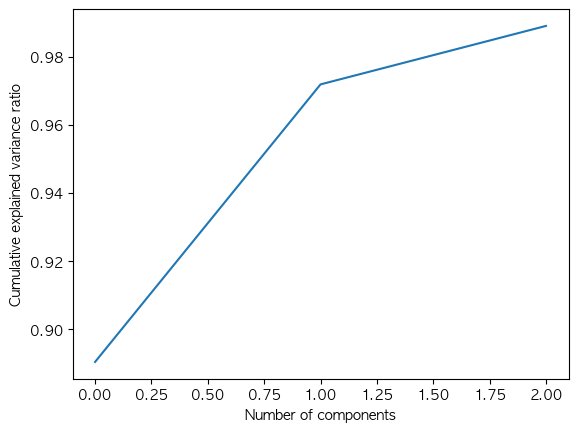

In [34]:

# PCA 수행
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# 변환된 데이터의 크기를 출력합니다.
print('Transformed data shape:', pca_result.shape)

# 변환된 데이터의 처음 5개 샘플을 출력합니다.
print('Transformed data:\n', pca_result[:5])

# 설명된 분산의 비율을 확인합니다.
explained_variance_ratio = pca.explained_variance_ratio_
print('Explained variance ratio:', explained_variance_ratio)

# 누적 설명 분산 비율을 계산합니다.
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 누적 설명 분산 비율을 그래프로 나타냅니다.
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()


### pca heatmap

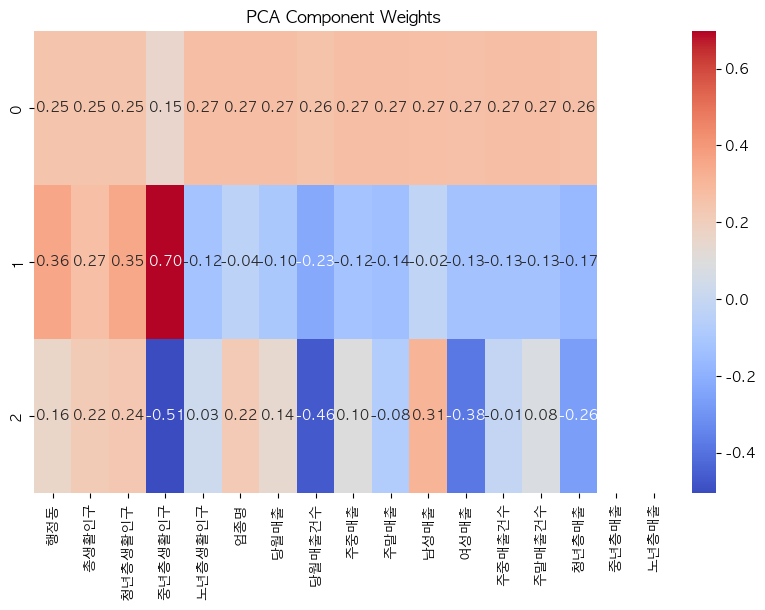

In [35]:

weights = pca.components_
n_components, n_features = weights.shape

# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(weights, cmap='coolwarm', annot=True, fmt='.2f', xticklabels=df.columns)
plt.title('PCA Component Weights')
plt.show()


In [36]:
print(pca.components_)


[[ 0.2487328   0.25061597  0.24932751  0.15479074  0.27084003  0.27001718
   0.27067385  0.25534926  0.27032979  0.2700679   0.26789805  0.2650857
   0.27052555  0.27021517  0.26497755]
 [ 0.35886848  0.26901537  0.35012224  0.69771238 -0.12312494 -0.03635821
  -0.09724066 -0.22569001 -0.12463856 -0.13943635 -0.02204144 -0.12835332
  -0.12925859 -0.1286467  -0.16549072]
 [ 0.1610196   0.21671996  0.23584555 -0.50550886  0.02741995  0.22126017
   0.1425887  -0.46333053  0.09851999 -0.07591845  0.31006988 -0.38071979
  -0.00825132  0.07762045 -0.26186729]]


In [37]:
# Create a PCA object.
pca = PCA(n_components=2)

# Normalize data using StandardScaler before extracting principal components.
X_scaled = StandardScaler().fit_transform(data)

# Perform principal component analysis.
X_pca = pca.fit_transform(X_scaled)

## 엘보우 포인트 / 실루엣 계수

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

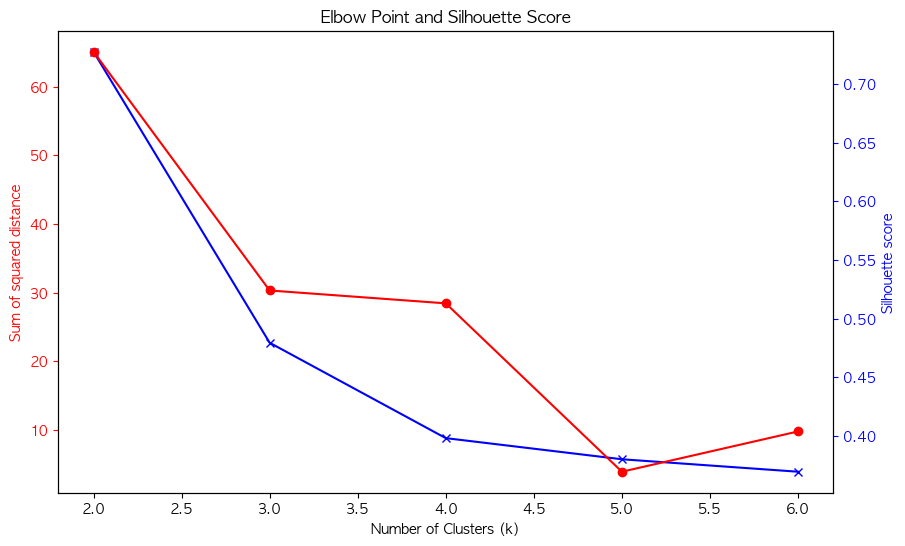

In [38]:
# 엘보우 포인트와 실루엣 계수를 저장할 리스트 초기화
sse = []
silhouette_coefficients = []

# 클러스터링을 위한 k 값 범위 설정
k_range = range(2, 7)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)
    
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_coefficients.append(score)

# 엘보우 포인트 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(k_range, sse, 'bx-')
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Sum of squared distance', color='r')
ax.set_title('Elbow Point and Silhouette Score')
ax.tick_params('y', colors='r')

# 실루엣 그래프 그리기
ax2 = ax.twinx()
ax2.plot(k_range, silhouette_coefficients, 'ro-')
ax2.set_ylabel('Silhouette score', color='b')
ax2.tick_params('y', colors='b')

plt.show()

## K-MEANS

### 군집 개수 3으로 설정

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


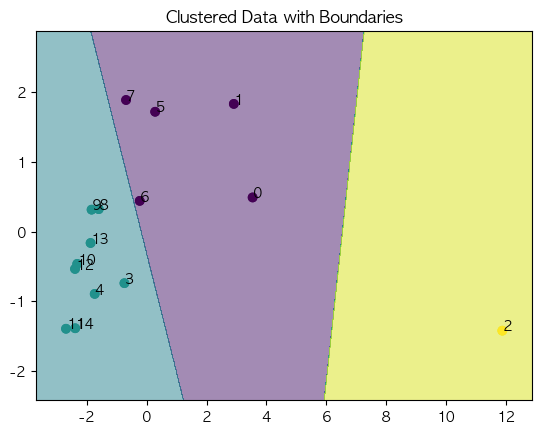

In [39]:
# Create a PCA object.
pca = PCA(n_components=2)

# Normalize data using StandardScaler before extracting principal components.
X_scaled = StandardScaler().fit_transform(data)

# Perform principal component analysis.
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, init='random', algorithm='auto')
kmeans.fit(X_pca)

# Check the cluster label for each data
cluster_labels = kmeans.labels_

# Visualize clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)

# Define the range for the grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

# Create a meshgrid of points
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the cluster labels for each point on the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the clustered data and the cluster boundaries
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
# Display index value on scatter plot
for i, point in enumerate(X_pca):
    plt.annotate(str(i), xy=point)
    
plt.title('Clustered Data with Boundaries')
plt.show()

#군집화 = 6

### 군집 개수 4로 설정

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


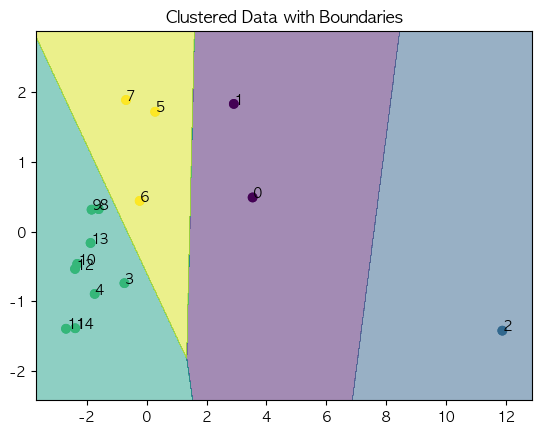

In [40]:
# Create a PCA object.
pca = PCA(n_components=2)

# Normalize data using StandardScaler before extracting principal components.
X_scaled = StandardScaler().fit_transform(data)

# Perform principal component analysis.
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=4, init='random', algorithm='auto')
kmeans.fit(X_pca)

# Check the cluster label for each data
cluster_labels = kmeans.labels_

# Visualize clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)

# Define the range for the grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

# Create a meshgrid of points
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the cluster labels for each point on the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the clustered data and the cluster boundaries
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
# Display index value on scatter plot
for i, point in enumerate(X_pca):
    plt.annotate(str(i), xy=point)
    
plt.title('Clustered Data with Boundaries')
plt.show()

#군집화 = 6

In [41]:
cluster_labels

array([0, 0, 1, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [42]:
df['kmeans_label']=cluster_labels
df

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,업종명,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출,kmeans_label
0,소공동,27907.641097,1407.112180,1352.580391,562.617307,커피-음료,1.155227e+10,1505578,1.087137e+10,6.808989e+08,4.906255e+09,4.219467e+09,1425989,79589,4.553155e+09,4.136165e+09,4.169566e+08,0
1,회현동,26546.049150,1184.752222,1325.987566,884.069711,커피-음료,8.656192e+09,1231612,7.795360e+09,8.608317e+08,3.087451e+09,3.394200e+09,1107643,123969,3.175605e+09,2.733691e+09,5.608388e+08,0
2,명동,36805.147840,2061.659380,1740.061549,719.163140,커피-음료,2.927405e+10,2845718,2.330994e+10,5.964108e+09,1.123405e+10,1.270296e+10,2422591,423127,1.221657e+10,9.773410e+09,1.825129e+09,1
3,필동,14392.644174,776.238428,555.861483,391.035360,커피-음료,3.104577e+09,459711,2.733308e+09,3.712690e+08,1.204369e+09,1.445962e+09,410270,49441,1.510944e+09,9.023940e+08,2.085104e+08,2
4,장충동,12580.356365,709.440171,492.069254,330.318729,커피-음료,1.102057e+09,63865,7.180812e+08,3.839753e+08,5.592346e+08,4.248951e+08,45617,18248,3.481098e+08,3.794151e+08,2.517700e+08,2
5,광희동,24360.175038,1313.304171,1028.583419,709.117618,커피-음료,2.677169e+09,344946,2.107375e+09,5.697946e+08,1.098574e+09,1.292065e+09,284893,60053,1.387635e+09,8.047095e+08,1.813575e+08,3
6,을지로동,17184.205399,805.896742,832.192192,599.189873,커피-음료,3.432808e+09,415668,2.907775e+09,5.250332e+08,1.412965e+09,1.464152e+09,362671,52997,1.627800e+09,1.062881e+09,1.821105e+08,3
7,신당동,22116.834544,1091.131011,1003.414341,720.570318,커피-음료,8.395211e+08,165853,7.051510e+08,1.343701e+08,3.448287e+08,4.455787e+08,140742,25111,4.519611e+08,2.943857e+08,4.113719e+07,3
8,다산동,14993.252805,623.212432,582.024076,566.484988,커피-음료,7.377679e+08,94150,5.283315e+08,2.094365e+08,3.149563e+08,3.725795e+08,70002,24148,3.742861e+08,2.329337e+08,7.508632e+07,2
9,약수동,13256.743571,453.704620,524.253548,607.463540,커피-음료,5.563038e+08,60881,4.065083e+08,1.497955e+08,2.510511e+08,2.264794e+08,41860,19021,2.658724e+08,1.398869e+08,6.876969e+07,2


=> 군집화 개수 4로 설정

## GMM(GaussianMixture)

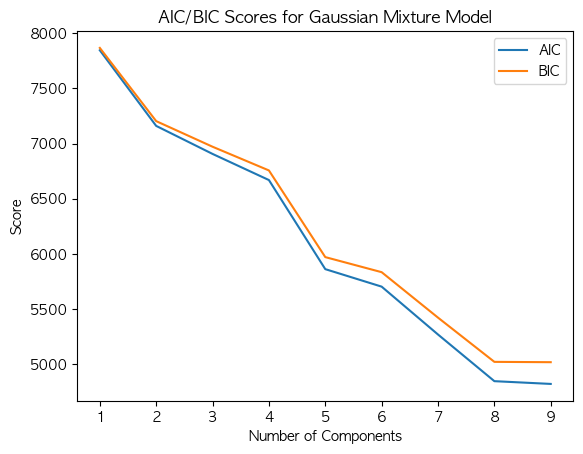

In [43]:
from sklearn.mixture import GaussianMixture

n_components_range = range(1, 10)
aic_values = []
bic_values = []
for n_components in n_components_range:
    #model = GaussianMixture(n_components=n_components, random_state=0)
    model = GaussianMixture(n_components=n_components, covariance_type='diag', random_state=0)
#covariance_type을 변경하니 해결됨 ->diag 
    model.fit(data)  # X는 클러스터링할 데이터입니다.
    aic = model.aic(data)
    bic = model.bic(data)
    aic_values.append(aic)
    bic_values.append(bic)

#AIC와 BIC 값을 플롯에 표시합니다.
plt.plot(n_components_range, aic_values, label='AIC')
plt.plot(n_components_range, bic_values, label='BIC')

# 플롯의 스타일과 레이블 등을 설정합니다.
plt.title('AIC/BIC Scores for Gaussian Mixture Model')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend()

# 그래프를 보여줍니다.
plt.show()

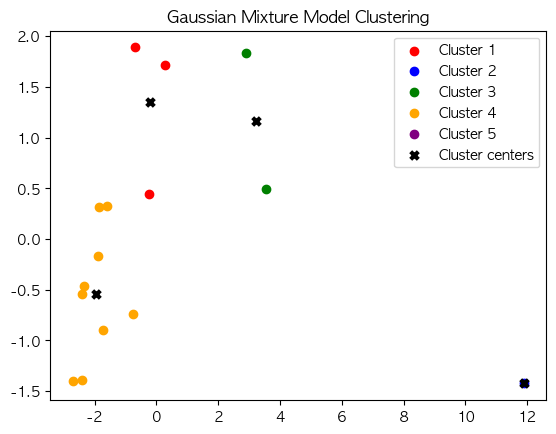

In [44]:
# gmm 모델 인스턴스화
gmm = GaussianMixture(n_components=4, random_state=42)

# 모델 학습
gmm.fit(X_pca)

# 클러스터 예측
centers = gmm.means_

labels = gmm.predict(X_pca)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_pca)

colors = ['red', 'blue', 'green', 'orange', 'purple']

fig, ax = plt.subplots()

for i in range(5):
    ax.scatter(pca_result[labels == i, 0], pca_result[labels == i, 1], color=colors[i], label=f"Cluster {i+1}")
ax.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', s=30, linewidth=3, label="Cluster centers")

# Chart settings
ax.set_title('Gaussian Mixture Model Clustering')
ax.legend()
plt.show()
# 1 11 2

In [45]:
labels

array([2, 2, 1, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3])

In [46]:
df['gmm_labels']=labels
df

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,업종명,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출,kmeans_label,gmm_labels
0,소공동,27907.641097,1407.112180,1352.580391,562.617307,커피-음료,1.155227e+10,1505578,1.087137e+10,6.808989e+08,4.906255e+09,4.219467e+09,1425989,79589,4.553155e+09,4.136165e+09,4.169566e+08,0,2
1,회현동,26546.049150,1184.752222,1325.987566,884.069711,커피-음료,8.656192e+09,1231612,7.795360e+09,8.608317e+08,3.087451e+09,3.394200e+09,1107643,123969,3.175605e+09,2.733691e+09,5.608388e+08,0,2
2,명동,36805.147840,2061.659380,1740.061549,719.163140,커피-음료,2.927405e+10,2845718,2.330994e+10,5.964108e+09,1.123405e+10,1.270296e+10,2422591,423127,1.221657e+10,9.773410e+09,1.825129e+09,1,1
3,필동,14392.644174,776.238428,555.861483,391.035360,커피-음료,3.104577e+09,459711,2.733308e+09,3.712690e+08,1.204369e+09,1.445962e+09,410270,49441,1.510944e+09,9.023940e+08,2.085104e+08,2,3
4,장충동,12580.356365,709.440171,492.069254,330.318729,커피-음료,1.102057e+09,63865,7.180812e+08,3.839753e+08,5.592346e+08,4.248951e+08,45617,18248,3.481098e+08,3.794151e+08,2.517700e+08,2,3
5,광희동,24360.175038,1313.304171,1028.583419,709.117618,커피-음료,2.677169e+09,344946,2.107375e+09,5.697946e+08,1.098574e+09,1.292065e+09,284893,60053,1.387635e+09,8.047095e+08,1.813575e+08,3,0
6,을지로동,17184.205399,805.896742,832.192192,599.189873,커피-음료,3.432808e+09,415668,2.907775e+09,5.250332e+08,1.412965e+09,1.464152e+09,362671,52997,1.627800e+09,1.062881e+09,1.821105e+08,3,0
7,신당동,22116.834544,1091.131011,1003.414341,720.570318,커피-음료,8.395211e+08,165853,7.051510e+08,1.343701e+08,3.448287e+08,4.455787e+08,140742,25111,4.519611e+08,2.943857e+08,4.113719e+07,3,0
8,다산동,14993.252805,623.212432,582.024076,566.484988,커피-음료,7.377679e+08,94150,5.283315e+08,2.094365e+08,3.149563e+08,3.725795e+08,70002,24148,3.742861e+08,2.329337e+08,7.508632e+07,2,3
9,약수동,13256.743571,453.704620,524.253548,607.463540,커피-음료,5.563038e+08,60881,4.065083e+08,1.497955e+08,2.510511e+08,2.264794e+08,41860,19021,2.658724e+08,1.398869e+08,6.876969e+07,2,3


## PAM (Patitioning Around Medoids)

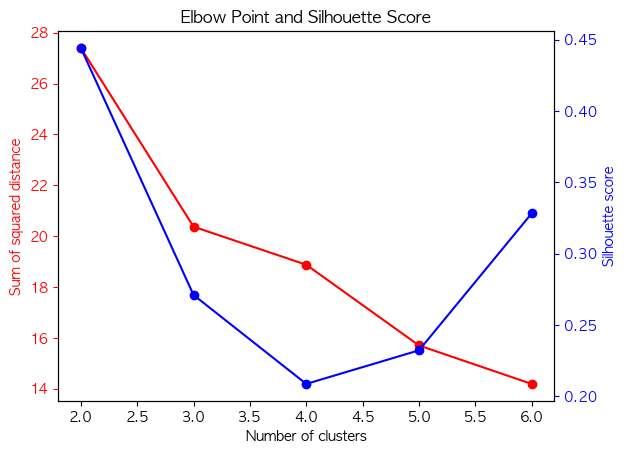

In [47]:
# k-medoids 알고리즘 적용
elbow_scores = []
silhouette_scores = []
for n_clusters in range(2, 7):
    kmedoids = KMedoids(n_clusters=n_clusters).fit(X_pca)
    elbow_scores.append(kmedoids.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmedoids.labels_))

# 엘보우 포인트와 실루엣 값을 그래프에 시각화
fig, ax1 = plt.subplots()

# 엘보우 포인트 그래프
ax1.plot(range(2, 7), elbow_scores, 'o-', color='r')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Sum of squared distance', color='r')
ax1.tick_params('y', colors='r')

# 실루엣 값 그래프
ax2 = ax1.twinx()
ax2.plot(range(2, 7), silhouette_scores, 'o-', color='b')
ax2.set_ylabel('Silhouette score', color='b')
ax2.tick_params('y', colors='b')

plt.title('Elbow Point and Silhouette Score')
plt.show()

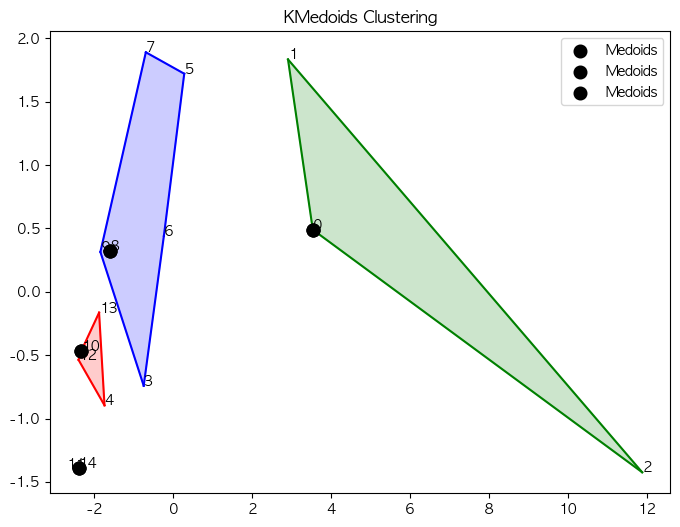

In [48]:
# Create and train KMedoids models
kmedoids = KMedoids(n_clusters=4, random_state=0)
y_kmedoids = kmedoids.fit_predict(X_pca)

# Define cluster colors
colors = ['r', 'g', 'b', 'y']

# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each cluster with different color and label
for i in range(4):
    cluster_points = X_pca[y_kmedoids == i]
    
    if len(cluster_points) >= 3:
        # Get indices of outermost points in the cluster
        hull = ConvexHull(cluster_points)
        outermost_points_idx = hull.vertices
        
        # Plot lines connecting outermost points and fill interior space
        n_points = len(outermost_points_idx)
        for j in range(n_points):
            ax.plot([cluster_points[outermost_points_idx[j], 0], cluster_points[outermost_points_idx[(j+1)%n_points], 0]],
                    [cluster_points[outermost_points_idx[j], 1], cluster_points[outermost_points_idx[(j+1)%n_points], 1]], color=colors[i])
        ax.fill(cluster_points[outermost_points_idx, 0], cluster_points[outermost_points_idx, 1], color=colors[i], alpha=0.2)
        
        # Plot Medoids as black markers
        medoids = kmedoids.cluster_centers_
        ax.scatter(medoids[:, 0], medoids[:, 1], marker='o', s=50,
                   linewidths=3, color='black', zorder=10, label='Medoids')

# Add point indices to the plot
for i, point in enumerate(X_pca):
    ax.annotate(str(i), xy=point)

# Set plot title and legend
ax.set_title('KMedoids Clustering')
ax.legend()

# Show the plot
plt.show()


In [49]:
df['y_kmedoids']=y_kmedoids
df

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,업종명,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출,kmeans_label,gmm_labels,y_kmedoids
0,소공동,27907.641097,1407.112180,1352.580391,562.617307,커피-음료,1.155227e+10,1505578,1.087137e+10,6.808989e+08,4.906255e+09,4.219467e+09,1425989,79589,4.553155e+09,4.136165e+09,4.169566e+08,0,2,1
1,회현동,26546.049150,1184.752222,1325.987566,884.069711,커피-음료,8.656192e+09,1231612,7.795360e+09,8.608317e+08,3.087451e+09,3.394200e+09,1107643,123969,3.175605e+09,2.733691e+09,5.608388e+08,0,2,1
2,명동,36805.147840,2061.659380,1740.061549,719.163140,커피-음료,2.927405e+10,2845718,2.330994e+10,5.964108e+09,1.123405e+10,1.270296e+10,2422591,423127,1.221657e+10,9.773410e+09,1.825129e+09,1,1,1
3,필동,14392.644174,776.238428,555.861483,391.035360,커피-음료,3.104577e+09,459711,2.733308e+09,3.712690e+08,1.204369e+09,1.445962e+09,410270,49441,1.510944e+09,9.023940e+08,2.085104e+08,2,3,2
4,장충동,12580.356365,709.440171,492.069254,330.318729,커피-음료,1.102057e+09,63865,7.180812e+08,3.839753e+08,5.592346e+08,4.248951e+08,45617,18248,3.481098e+08,3.794151e+08,2.517700e+08,2,3,0
5,광희동,24360.175038,1313.304171,1028.583419,709.117618,커피-음료,2.677169e+09,344946,2.107375e+09,5.697946e+08,1.098574e+09,1.292065e+09,284893,60053,1.387635e+09,8.047095e+08,1.813575e+08,3,0,2
6,을지로동,17184.205399,805.896742,832.192192,599.189873,커피-음료,3.432808e+09,415668,2.907775e+09,5.250332e+08,1.412965e+09,1.464152e+09,362671,52997,1.627800e+09,1.062881e+09,1.821105e+08,3,0,2
7,신당동,22116.834544,1091.131011,1003.414341,720.570318,커피-음료,8.395211e+08,165853,7.051510e+08,1.343701e+08,3.448287e+08,4.455787e+08,140742,25111,4.519611e+08,2.943857e+08,4.113719e+07,3,0,2
8,다산동,14993.252805,623.212432,582.024076,566.484988,커피-음료,7.377679e+08,94150,5.283315e+08,2.094365e+08,3.149563e+08,3.725795e+08,70002,24148,3.742861e+08,2.329337e+08,7.508632e+07,2,3,2
9,약수동,13256.743571,453.704620,524.253548,607.463540,커피-음료,5.563038e+08,60881,4.065083e+08,1.497955e+08,2.510511e+08,2.264794e+08,41860,19021,2.658724e+08,1.398869e+08,6.876969e+07,2,3,2


# 군집화 결과

In [50]:
clustering_result=df[['행정동','kmeans_label','gmm_labels','y_kmedoids']]
clustering_result
clustering_result=clustering_result.reset_index()
clustering_result

,index,행정동,kmeans_label,gmm_labels,y_kmedoids
0,0,소공동,0,2,1
1,1,회현동,0,2,1
2,2,명동,1,1,1
3,3,필동,2,3,2
4,4,장충동,2,3,0
5,5,광희동,3,0,2
6,6,을지로동,3,0,2
7,7,신당동,3,0,2
8,8,다산동,2,3,2
9,9,약수동,2,3,2


# 시각화

In [51]:
import folium
g= folium.Map(location = [37.5642135, 127.0016985],
                  tiles = 'openstreetmap', zoom_start=11.2)
g

## json파일 불러오기

In [52]:
import json
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
# seoul_geo = json.load(open(jpath, encoding='utf-8'))


## kmeans 시각화